# Explore here

1. Recopilación de datos

In [10]:
# Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Exploración y limpieza de datos

In [11]:
data.shape
# nuestro dataset tiene 768 filas y 9 columnas 

(768, 9)

In [12]:
data.info()

# No presentamos datos nulos y todas nuestras variables son de tipo numerico

# Datos numericos: Pregnancies, Glucose, BloodPressure , kinThickness , Insulin BMI,  DiabetesPedigreeFunction, Age
# Datos categoricos: Outcome

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Revisar si existe duplicados y si es asi los elimina 

data = data.drop_duplicates().reset_index(drop = True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#Se elimina datos irrelevante
data.drop(["Pregnancies","SkinThickness", "Age"], axis = 1, inplace = True)
data.head()

#Nos quedamos con las siguientes variables 
# Datos numericos: Glucose, BloodPressure  , Insulin BMI,  DiabetesPedigreeFunction, Outcome
# Datos categoricos: Outcome


,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,72,0,33.6,0.627,1
1,85,66,0,26.6,0.351,0
2,183,64,0,23.3,0.672,1
3,89,66,94,28.1,0.167,0
4,137,40,168,43.1,2.288,1


In [15]:
data.columns 

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

3. Análisis de variables univariante

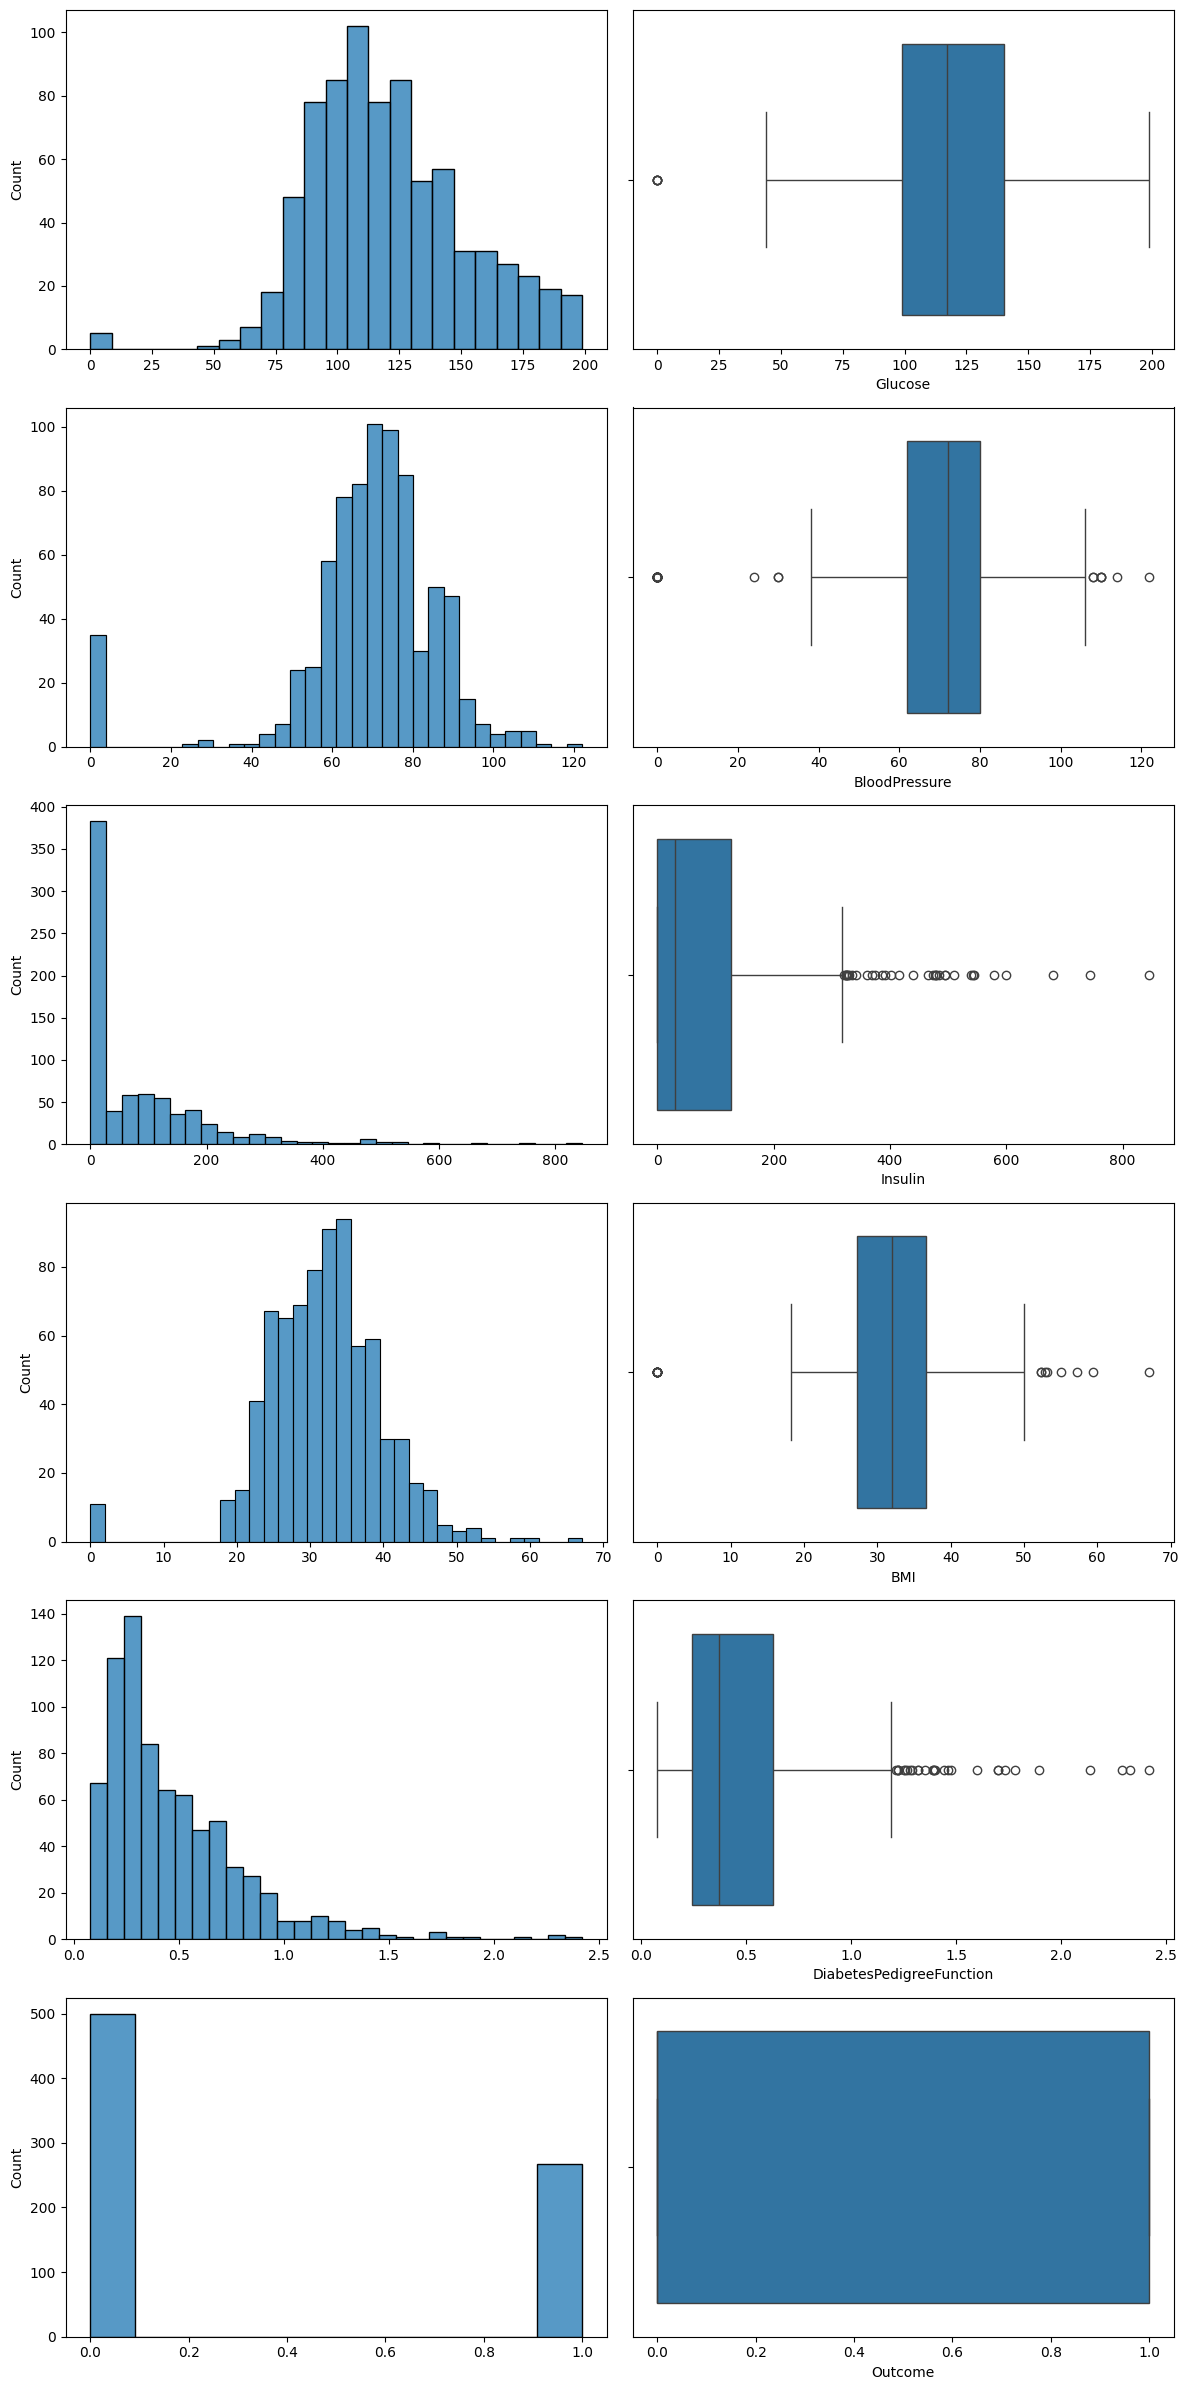

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes (6 filas, 2 columnas), ya que tienes 6 variables
fig, axes = plt.subplots(6, 2, figsize=(12, 24))

# Lista de variables a graficar
variables = ['Glucose', 'BloodPressure', 'Insulin', 'BMI',
             'DiabetesPedigreeFunction', 'Outcome']

# Iterar sobre cada variable y graficar histplot y boxplot
for i, var in enumerate(variables):
    sns.histplot(ax=axes[i, 0], data=data, x=var).set(xlabel=None)
    sns.boxplot(ax=axes[i, 1], data=data, x=var)

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# se observa 
# tiene una forma de distribucion leve normal en la Glucose, BloodPressure, BMI 
# Tenemos varios outliers especialmente en BloodPressure,Insulin, BMI y 


4. Análisis de variables multivariante

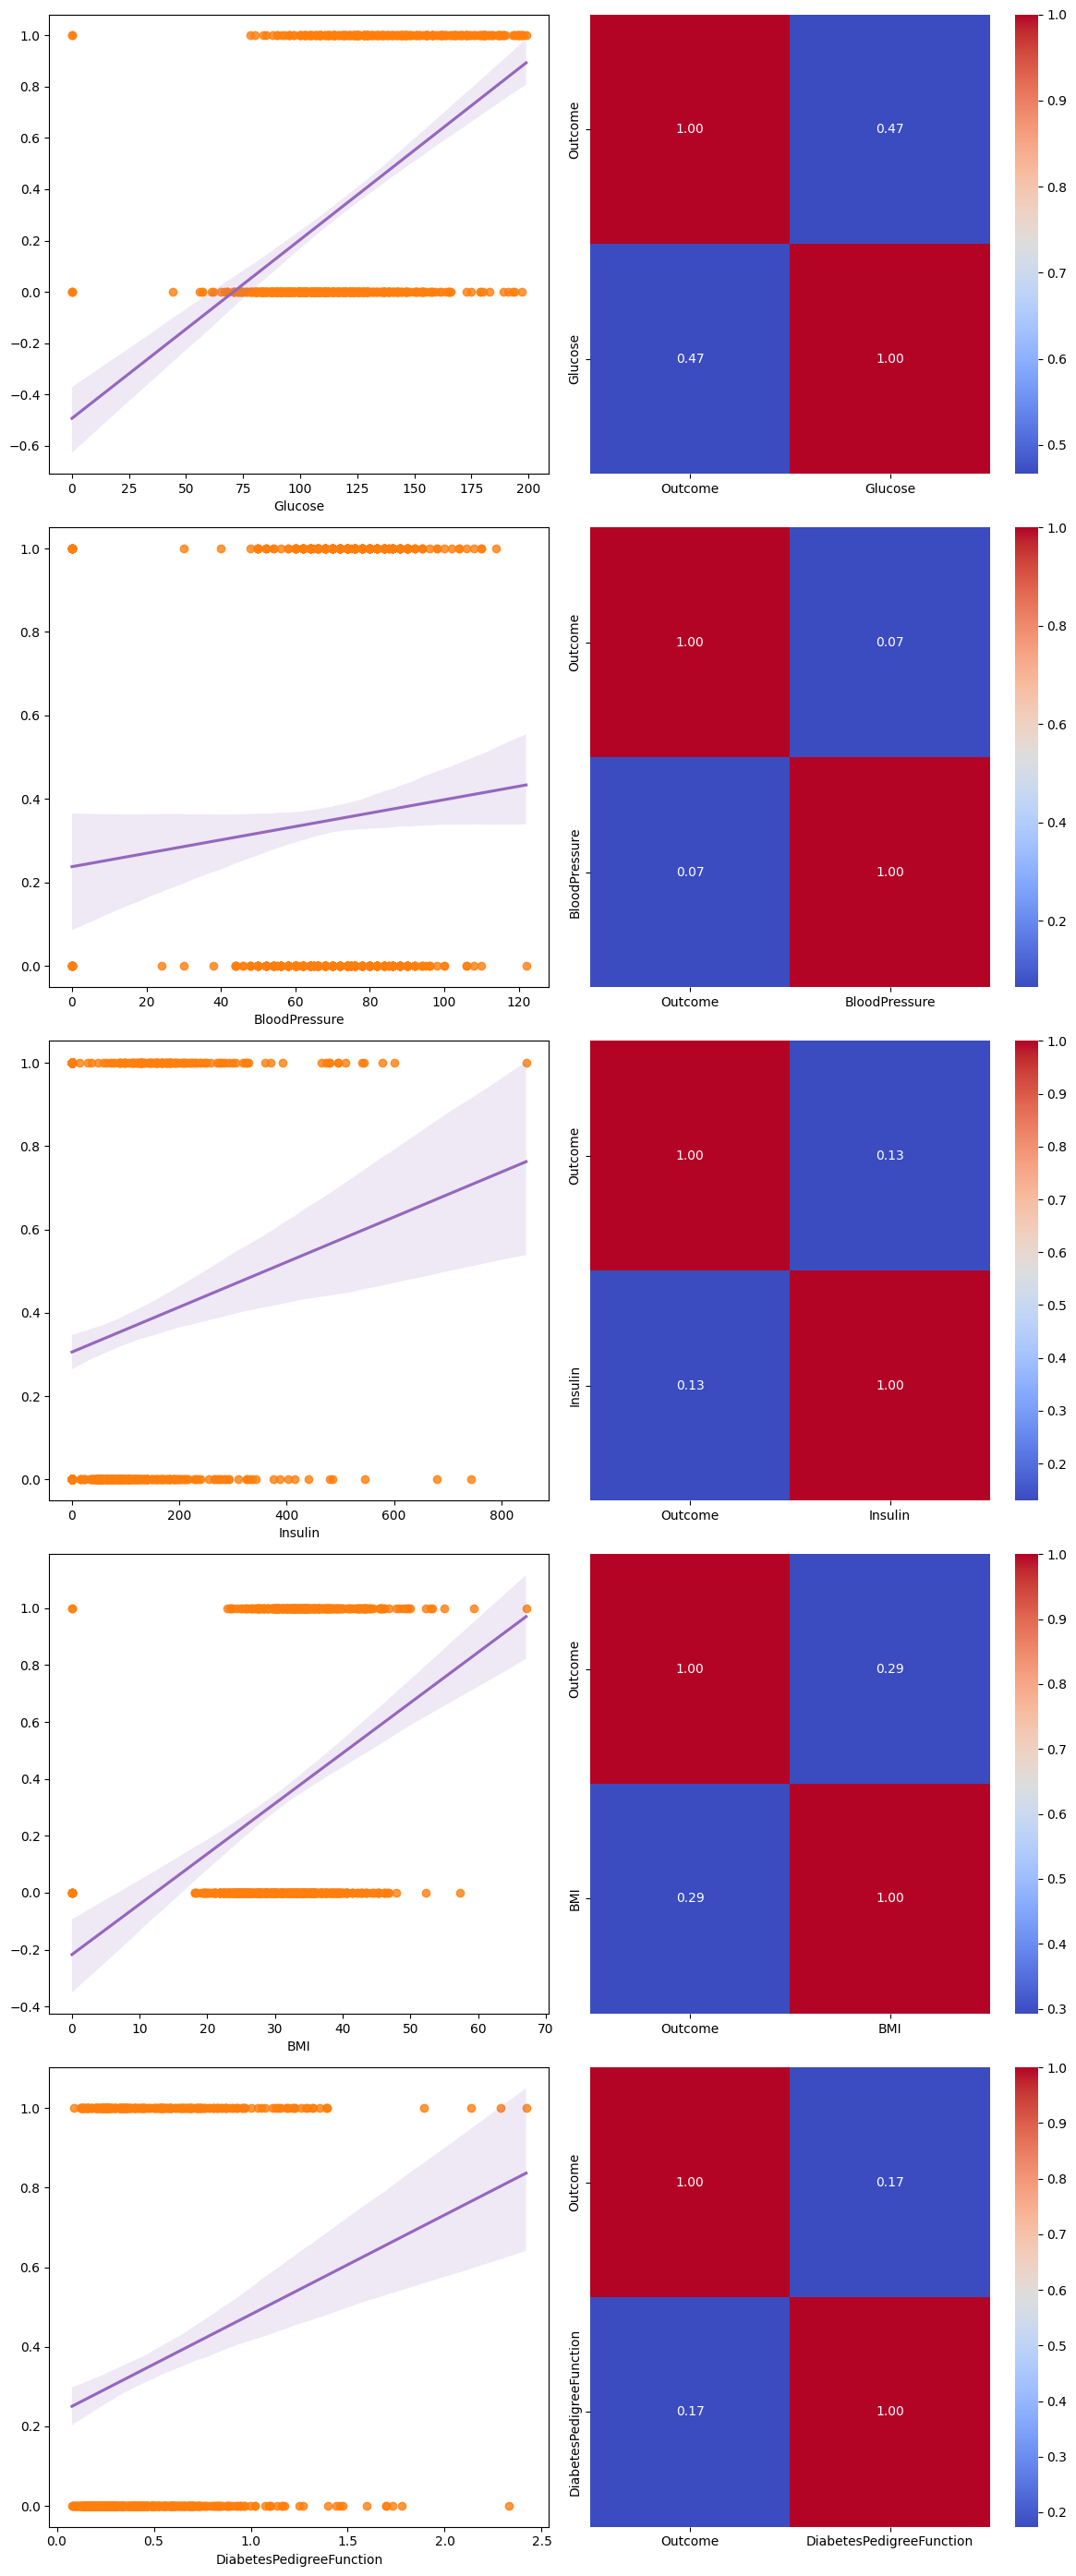

In [18]:
# Crear la figura y los ejes (7 filas, 2 columnas)
fig, axis = plt.subplots, 2, figsize=(12, 28))

# Lista de variables a graficar
variables = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


# Iterar sobre cada variable y graficar regplot y heatmap
for i, var in enumerate(variables):
    # Regplot (Gráfico de regresión)
    sns.regplot(ax=axis[i, 0], data=data, x=var, y="Outcome", 
                scatter_kws={'color': '#ff7f0e'}, line_kws={'color': '#9467bd'}).set(ylabel=None)
    
    # Heatmap (Mapa de calor de correlación)
    sns.heatmap(data[["Outcome", var]].corr(), annot=True, fmt=".2f", 
                ax=axis[i, 1], cmap='coolwarm')

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()